In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pplt
import seaborn as sns

In [68]:
df=pd.read_csv("heart.csv")

In [69]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [70]:
df.shape

(918, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [72]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


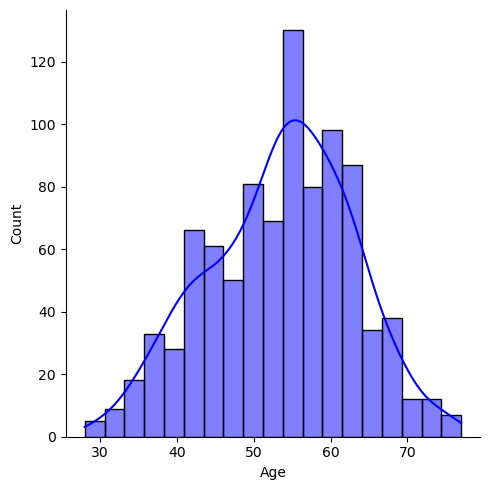

In [73]:
sns.displot(df['Age'], kde = True, color = 'blue')

C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


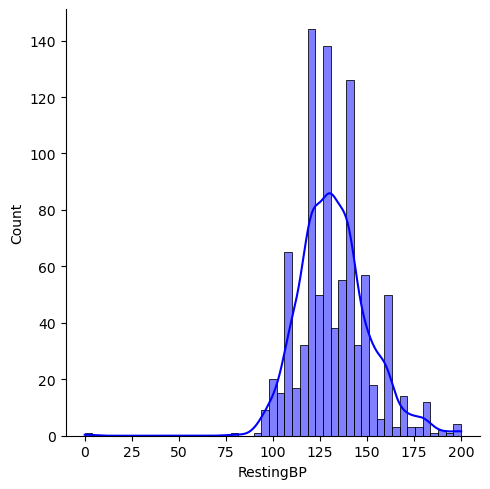

In [74]:
sns.displot(x = df['RestingBP'], kde = True, color = 'blue')

C:\Users\Ramtej\Desktop\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


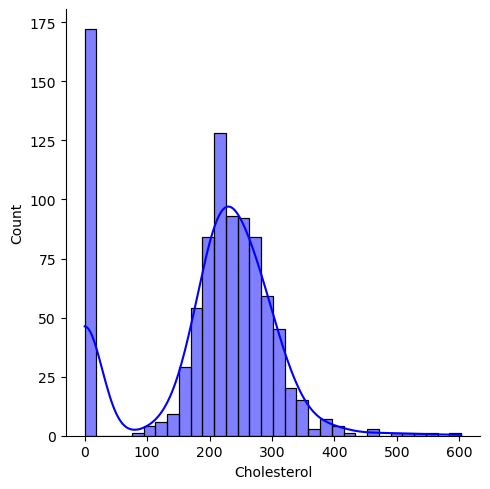

In [75]:
sns.displot(df['Cholesterol'], kde = True, color = 'blue')

<Axes: >

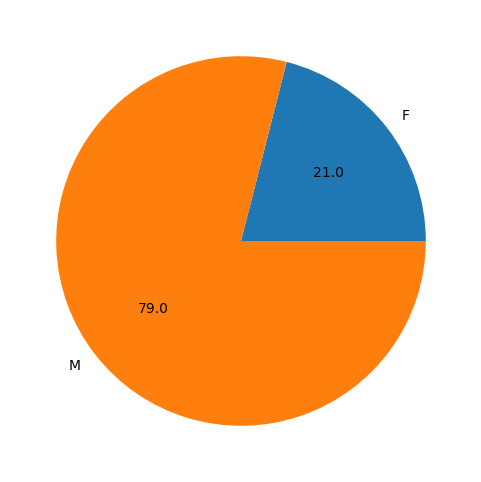

In [76]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

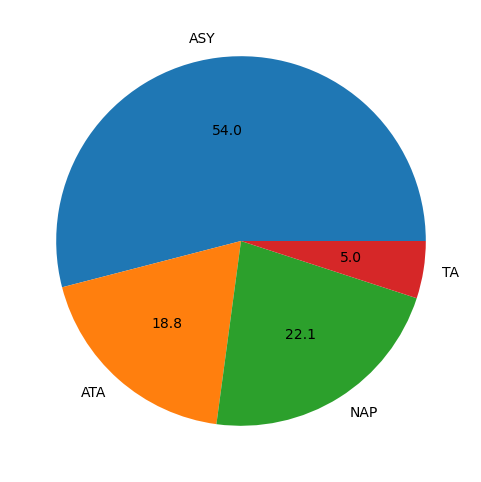

In [77]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: xlabel='HeartDisease', ylabel='Sex'>

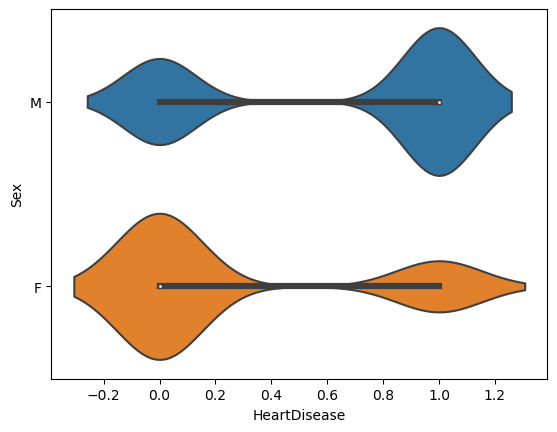

In [78]:
sns.violinplot(y = df['Sex'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

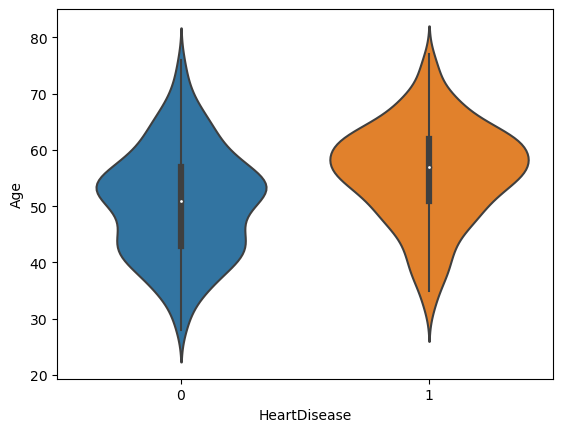

In [79]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

<Axes: >

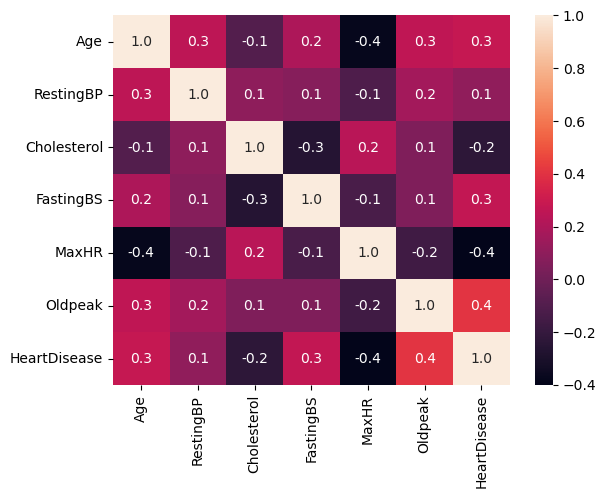

In [80]:
sns.heatmap(df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']].corr(),annot=True,fmt='.1f')

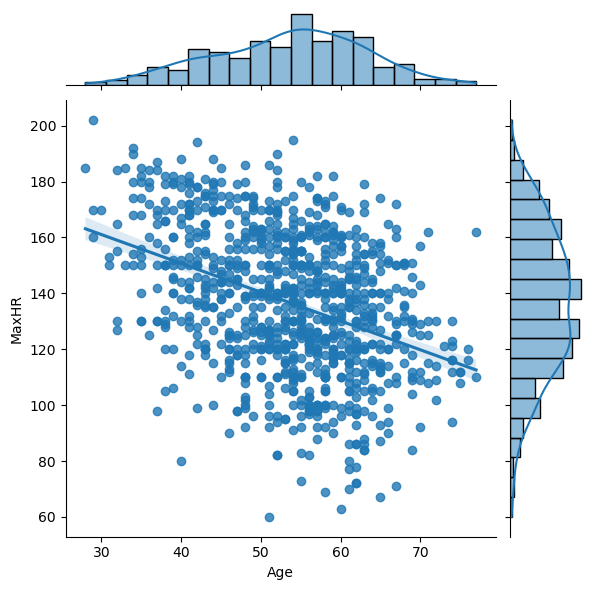

In [81]:
sns.jointplot(x = 'Age' , y = 'MaxHR', data = df, kind = 'reg')

In [82]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [83]:
columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

In [84]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [85]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df.drop(["HeartDisease"],axis=1)
Y = df["HeartDisease"]

In [88]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [90]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(xtrain,ytrain)
tr_pred_rf = model_rf.predict(xtrain)
ts_pred_rf = model_rf.predict(xtest)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 0.8804347826086957


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

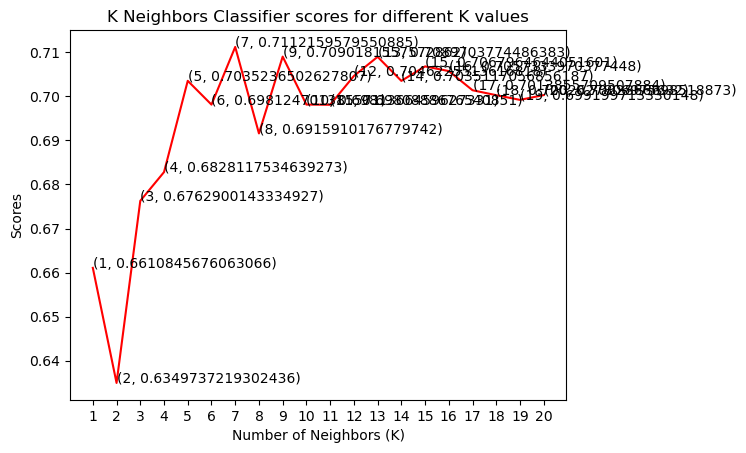

In [95]:
pplt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    pplt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
pplt.xticks([i for i in range(1, 21)])
pplt.xlabel('Number of Neighbors (K)')
pplt.ylabel('Scores')
pplt.title('K Neighbors Classifier scores for different K values')

In [97]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X,Y,cv=10)

In [98]:
score.mean()

0.7112159579550885